# 3: Multiple Linear Regression Exercise

### Getting Started
#### Import Libraries 
We import our standard libraries and specific objects/libraries at the top level of our notebook. By adding only specific objects from key modules, such as `statmodels`, we keep our *namespace* more organized. 

In [1]:
# Import libraries and objects
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings # for muting warning messages
# mute warning messages
warnings.filterwarnings('ignore')
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)

Let's take a look at the `Boston` data set

In [2]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


Hint: Type `Boston` to find out more about the dataset.

### Multiple Linear Regression

To fit a multiple linear regression model using least squares, we again use the `ModelSpec()` transform to construct the required model matrix and response. The arguments to `ModelSpec()` can be quite general, but in this case a list of column names is fine. We consider a fit here with the two variables `rm` and `nox`.

In [3]:
y = Boston['medv']
X = MS(['rm', 'nox']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,-18.2059,3.339,-5.452,0.0
rm,8.1567,0.417,19.546,0.0
nox,-18.9706,2.530,-7.497,0.0


Notice how we have compacted the first line into a succinct expression describing the construction of `X`.

The `Boston` data set contains 12 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [4]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

We can now fit the model with all the variables in `terms` using the same model matrix builder.

In [5]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, `age` has a high $p$`-value`. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except `age`.

In [6]:
minus_age = Boston.columns.drop(['medv', 'age']) 
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


### Qualitative Predictors

Here we use the `Boston` data again. 

We can examine the relationship between `medv` and `chas`, where

\begin{align*}
\text{chas} = \left\{\begin{array}{ll}
1 & \text { if tract bounds Charles River} \\
0 & \text { if not}
\end{array}\right\}
\end{align*}


In [7]:
# Perform regression
model = sm.OLS.from_formula('medv ~ chas', data=Boston)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           7.39e-05
Time:                        16:05:07   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.0938      0.418     52.902      0.0

$\hat \beta_0 = 22.094$: the average median house value for suburbs that are not bound by the Charles river.

$\hat \beta_1 = 6.346$: the difference in the average median house value for suburbs that are bound by the Charles River versus those that are not.

### Interaction Term

Let's look at the relationship between the response `medv` and the predictors `lstat` (the percent of households with low socioeconomic status) and `age` (the percent of homes built prior to 1940). We can also include the interaction term between `lstat` and `age`.

The syntax used to implement this is `lm(y ~ x1 + x2 + x1:x2, data)` or `lm(y ~ x1 * x2, data)` for shorthand.

In [8]:
model = sm.OLS.from_formula('medv ~ lstat * age', data=Boston)
result = model.fit()

# Print the summary of the regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           4.86e-88
Time:                        16:05:39   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

The interaction term has a $p$-value of $0.025$. Even though the $p$-value for `age` is not significant, we will still include it in our model due to the hierarchical principal.

### Helpful plots

There are a few plots that we discussed that can help to identify problems with our data or with our fit.

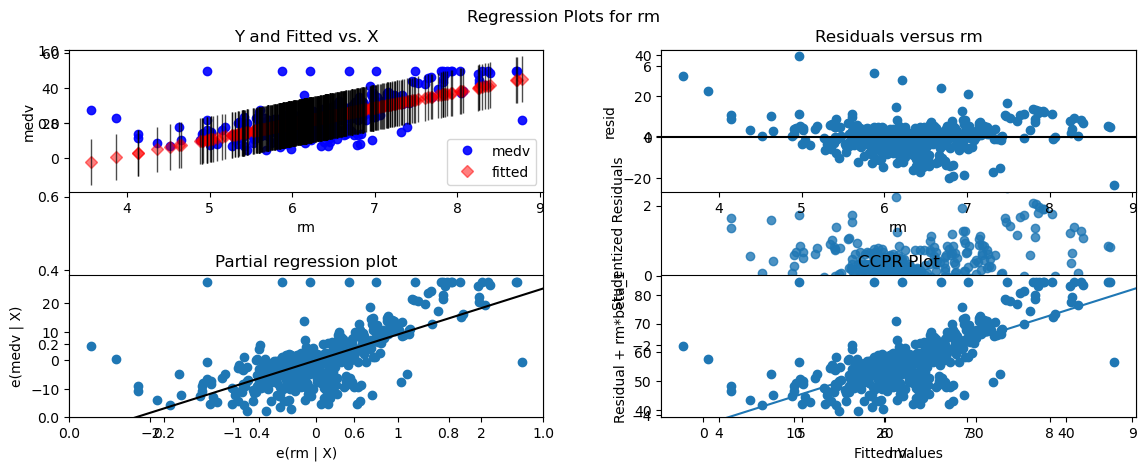

In [9]:
model = sm.OLS.from_formula('medv ~ rm', data=Boston)
result = model.fit()

# Plot the specified diagnostic plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Residuals vs. Fitted Values Plot
sm.graphics.plot_regress_exog(result, 'rm', fig=fig)

# Studentized Residuals vs. Fitted Values Plot
ax[1].scatter(result.fittedvalues, result.get_influence().resid_studentized_internal, alpha=0.8)
ax[1].set_xlabel('Fitted Values')
ax[1].set_ylabel('Studentized Residuals')

plt.show()

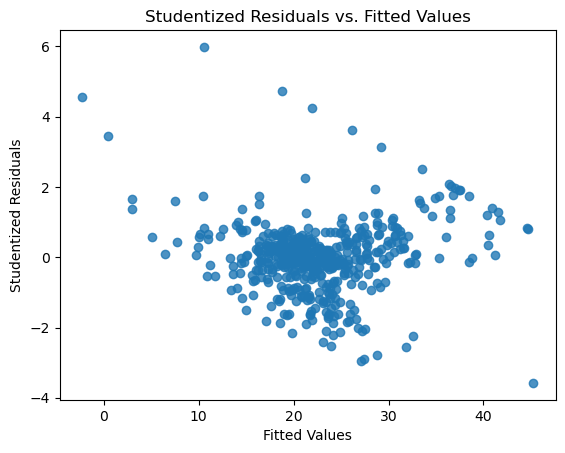

In [10]:
# Fit a linear regression model
model = sm.OLS.from_formula('medv ~ rm', data=Boston)
result = model.fit()

# Get the predicted values and studentized residuals
predicted_values = result.predict()
studentized_residuals = result.get_influence().resid_studentized_internal

# Plot the Studentized Residuals vs. Fitted Values
plt.scatter(predicted_values, studentized_residuals, alpha=0.8)
plt.xlabel('Fitted Values')
plt.ylabel('Studentized Residuals')
plt.title('Studentized Residuals vs. Fitted Values')
plt.show()

***What information about our fitted model can you gather from these plots? Are there any outliers or high leverage points?***

***Fit a linear regression model on the `Boston` data set including all the predictors. The shorthand for this is `lm(medv ~ .)`. Interpret the summary including the hypothesis tests for the coefficients and the RSE and $R^2 values. Make plots of the fit including confidence intervals for the fitted line. Recreate and interpret the three plots we have just made using your new fit.***

Ask for help if you get stuck!


*These exercises were adapted from :* James, Gareth, et al. An Introduction to Statistical Learning: with Applications in Python, Springer, 2023.